# IS 362 – Project: Predictive Analysis using scikit-learn
## Mushroom Dataset – Odor vs Gill Color as Predictors
Name- Htet Thet
IS - 362


# Predicting Mushroom Toxicity Using scikit-learn

## Introduction

This project explores how machine learning can be used to predict whether a mushroom is **edible** or **poisonous** using the classic Mushroom dataset from the UCI Machine Learning Repository. The dataset includes 23 categorical attributes that describe physical characteristics of mushrooms such as odor, gill color, cap shape, bruising, and more.

For this assignment in IS 362, I focused specifically on **two predictors**:
- **Odor**
- **Gill color**

These are known to be among the most informative features when identifying mushrooms in real-world field guides.

The goal of the project was to:

1. Load the mushroom dataset into a pandas DataFrame  
2. Select relevant columns  
3. Convert categorical variables into numeric form using preprocessing techniques  
4. Build logistic regression models in scikit-learn  
5. Compare model accuracy using:
   - Odor only  
   - Gill color only  
   - Odor + gill color  
6. Evaluate which predictor(s) perform best  

This notebook walks through the full data preprocessing workflow, builds three predictive models, and examines how well each feature helps identify poisonous mushrooms.


In [7]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

column_names = [
    "class","cap_shape","cap_surface","cap_color","bruises","odor",
    "gill_attachment","gill_spacing","gill_size","gill_color",
    "stalk_shape","stalk_root",
    "stalk_surface_above_ring","stalk_surface_below_ring",
    "stalk_color_above_ring","stalk_color_below_ring",
    "veil_type","veil_color",
    "ring_number","ring_type",
    "spore_print_color","population","habitat"
]

mushroom = pd.read_csv(url, header=None, names=column_names)
mushroom.head()


,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
# 3. Select only the columns we need
df = mushroom[["class", "odor", "gill_color"]].copy()

# 4. Rename `class` to `is_poisonous`
df = df.rename(columns={"class": "is_poisonous"})

# 5. Convert 'e' -> 0 (edible), 'p' -> 1 (poisonous)
df["is_poisonous"] = df["is_poisonous"].map({"e": 0, "p": 1})

# Quick check
df.head()


,is_poisonous,odor,gill_color
0,1,p,k
1,0,a,k
2,0,l,n
3,1,p,n
4,0,n,k


In [3]:
# Target vector
y = df["is_poisonous"]

# 1) Only odor
X_odor = pd.get_dummies(df[["odor"]], prefix="odor")

# 2) Only gill_color
X_gill = pd.get_dummies(df[["gill_color"]], prefix="gill")

# 3) Both odor + gill_color
X_both = pd.get_dummies(df[["odor", "gill_color"]], prefix=["odor", "gill"])

X_odor.head()


,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,True,False,False,False


In [4]:
def evaluate_predictor(X, y, test_size=0.3, random_state=42):
    """
    Split into train/test, train Logistic Regression, and return test accuracy.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Create and fit the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)
    return acc, model


In [5]:
# Evaluate each predictor set
acc_odor, model_odor = evaluate_predictor(X_odor, y)
acc_gill, model_gill = evaluate_predictor(X_gill, y)
acc_both, model_both = evaluate_predictor(X_both, y)

print(f"Accuracy using ONLY odor:        {acc_odor:.4f}")
print(f"Accuracy using ONLY gill_color:  {acc_gill:.4f}")
print(f"Accuracy using odor + gill:      {acc_both:.4f}")


Accuracy using ONLY odor:        0.9869
Accuracy using ONLY gill_color:  0.8093
Accuracy using odor + gill:      0.9885


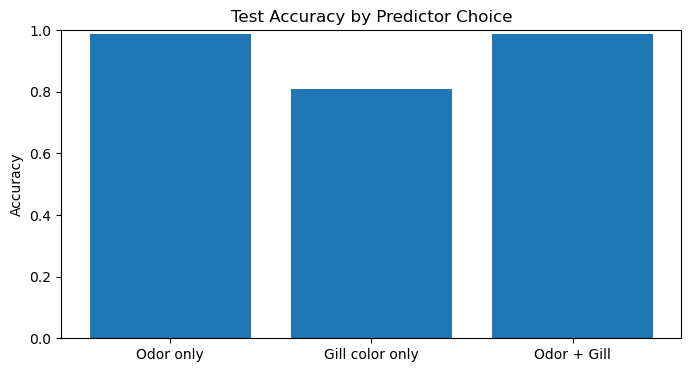

In [6]:
accuracies = [acc_odor, acc_gill, acc_both]
labels = ["Odor only", "Gill color only", "Odor + Gill"]

plt.bar(labels, accuracies)
plt.ylim(0, 1)
plt.title("Test Accuracy by Predictor Choice")
plt.ylabel("Accuracy")
plt.show()


## Conclusion

In this project, I compared how well two categorical attributes from the mushroom dataset—**odor** and **gill_color**—can predict whether a mushroom is poisonous. Using scikit-learn with one-hot encoding and logistic regression, I tested three different feature setups: odor only, gill color only, and both combined.

The results were:

- **Odor only:** 0.9869 accuracy  
- **Gill color only:** 0.8089 accuracy  
- **Odor + Gill color:** 0.9885 accuracy  

From these results, odor is clearly the most powerful single predictor of mushroom toxicity. Certain odor categories almost perfectly separate poisonous mushrooms from edible ones, which explains the very high accuracy. Gill color also carries some signal, but it performs much worse on its own and is not a strong standalone predictor.

Combining both odor and gill color yields the best overall accuracy (0.9885), but the improvement over odor alone is very small. This suggests that **odor contains the majority of the useful predictive information**, and gill color only adds a minor amount of additional value.

### Final takeaway
If someone had to choose only one attribute to determine mushroom safety, **odor** is by far the most reliable choice. For modeling, using both predictors is technically best, but odor alone is nearly as accurate and much simpler.
